In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score

In [2]:
### Constants
seed = 69
cv_size = .3

In [3]:
train = pd.read_csv("data/Train.csv", encoding="ISO-8859-1")
test = pd.read_csv("data/Test.csv", encoding="ISO-8859-1")


In [4]:
for each in train.columns:
    print(each)
    temp = train.groupby(each)[each].nunique()
    print(len(temp))
    
# encode_cols = ["month", "browser", "operatingSystem", "deviceCategory", "continent", 
#               "subContinent", "country", "region", "metro", "city", "medium"]

# other_cols = ["visitNumber","timeSinceLastVisit" "isMobile", "hits", "pageviews", "bounces", "newVisits"]

sessionId
83578
custId
56700
date
366
year
2
month
12
channelGrouping
8
visitStartTime
83428
visitNumber
284
timeSinceLastVisit
24490
browser
29
operatingSystem
15
isMobile
2
deviceCategory
3
continent
5
subContinent
22
country
184
region
322
metro
73
city
501
networkDomain
5645
topLevelDomain
190
campaign
6
source
147
medium
5
keyword
474
isTrueDirect
2
referralPath
446
adContent
25
adwordsClickInfo.page
6
adwordsClickInfo.slot
2
adwordsClickInfo.gclId
1706
adwordsClickInfo.adNetworkType
1
adwordsClickInfo.isVideoAd
1
hits
207
pageviews
159
bounces
1
newVisits
1
revenue
3560


In [5]:
train.head()

,sessionId,custId,date,year,month,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,...,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,hits,pageviews,bounces,newVisits,revenue
0,100000110,1,2016-10-29,2016,10,Social,1477775021,1,0,Chrome,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0
1,400000140,4,2016-09-04,2016,9,Social,1473037945,1,0,Safari,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0
2,500000150,5,2017-07-17,2017,7,Organic Search,1500305542,1,0,Chrome,...,NaN,NaN,NaN,NaN,NaN,5,5.0,NaN,1.0,0.0
3,500000250,5,2017-07-17,2017,7,Organic Search,1500322111,2,16569,Chrome,...,NaN,NaN,NaN,NaN,NaN,3,3.0,NaN,NaN,0.0
4,700000170,7,2016-08-22,2016,8,Social,1471890172,1,0,Safari,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0


In [6]:
train.head()

,sessionId,custId,date,year,month,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,...,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,hits,pageviews,bounces,newVisits,revenue
0,100000110,1,2016-10-29,2016,10,Social,1477775021,1,0,Chrome,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0
1,400000140,4,2016-09-04,2016,9,Social,1473037945,1,0,Safari,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0
2,500000150,5,2017-07-17,2017,7,Organic Search,1500305542,1,0,Chrome,...,NaN,NaN,NaN,NaN,NaN,5,5.0,NaN,1.0,0.0
3,500000250,5,2017-07-17,2017,7,Organic Search,1500322111,2,16569,Chrome,...,NaN,NaN,NaN,NaN,NaN,3,3.0,NaN,NaN,0.0
4,700000170,7,2016-08-22,2016,8,Social,1471890172,1,0,Safari,...,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0,0.0


In [7]:
train.columns

Index(['sessionId', 'custId', 'date', 'year', 'month', 'channelGrouping',
       'visitStartTime', 'visitNumber', 'timeSinceLastVisit', 'browser',
       'operatingSystem', 'isMobile', 'deviceCategory', 'continent',
       'subContinent', 'country', 'region', 'metro', 'city', 'networkDomain',
       'topLevelDomain', 'campaign', 'source', 'medium', 'keyword',
       'isTrueDirect', 'referralPath', 'adContent', 'adwordsClickInfo.page',
       'adwordsClickInfo.slot', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.isVideoAd', 'hits',
       'pageviews', 'bounces', 'newVisits', 'revenue'],
      dtype='object')

In [8]:
train.shape

(83578, 38)

In [9]:
train.iloc[2]

sessionId                                500000150
custId                                           5
date                                    2017-07-17
year                                          2017
month                                            7
channelGrouping                     Organic Search
visitStartTime                          1500305542
visitNumber                                      1
timeSinceLastVisit                               0
browser                                     Chrome
operatingSystem                            Windows
isMobile                                         0
deviceCategory                             desktop
continent                                 Americas
subContinent                      Northern America
country                                     Canada
region                                         NaN
metro                                          NaN
city                                           NaN
networkDomain                  

In [10]:
min(train["revenue"].values)

0.0

In [11]:
max(train["revenue"].values)

10589.14

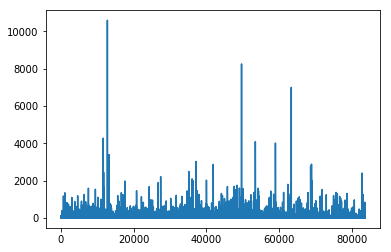

In [12]:
plt.plot(train["revenue"])

In [13]:
X = train.loc[:, train.columns != 'revenue']
y = train["revenue"]

In [14]:
# encode string input values as integers
features = []
encode_cols = ["month", "channelGrouping", "browser", "operatingSystem", "deviceCategory", "continent", 
              "subContinent", "country", "region", "metro", "city", "networkDomain", "topLevelDomain", 
               "campaign", "source", "medium", 
              ]
encode_cols = ["month", "channelGrouping", "browser", "operatingSystem", "deviceCategory", "continent", 
                "subContinent", "country", "region", "metro", "city", "topLevelDomain", "campaign", "source", 
                "medium", "keyword", "referralPath", "adContent", "adwordsClickInfo.page", "adwordsClickInfo.slot",
                "adwordsClickInfo.adNetworkType", "bounces", "newVisits"
              ]

# encode string input values as integers
encoded_x = None
for i in encode_cols:
    col = X[i].apply(str)
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(col.fillna('0'))
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("X shape: ", encoded_x.shape)
# encoded_x = np.array(features)
# encoded_x = encoded_x.reshape(X.shape[0], X.shape[1])

X shape:  (83578, 2498)


In [15]:
other_cols = ["visitNumber", "timeSinceLastVisit", "isMobile", "isTrueDirect", "hits", "pageviews"]

In [16]:
X = np.concatenate((X[other_cols].fillna(0), encoded_x), axis=1)

In [17]:
y = Binarizer().transform(y.values.reshape(-1, 1))

In [18]:
print(max(y))
print(min(y))

[1.]
[0.]


In [19]:
print(X.shape)

(83578, 2504)


In [20]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=cv_size)#, random_state=seed)

In [21]:
print(X_train.shape)
print(X_cv.shape)

(58504, 2504)
(25074, 2504)


In [22]:
print(y_train.shape)
print(y_cv.shape)

(58504, 1)
(25074, 1)


In [23]:
xgtrain = xgb.DMatrix(X_train, y_train)
xgcv = xgb.DMatrix(X_cv, y_cv)

In [ ]:
# Specify sufficient boosting iterations to reach a minimum
num_round = 500
evallist = [(xgcv, 'eval'), (xgtrain, 'train')]
# Leave most parameters as default
param = {'objective': 'binary:logistic',
         'tree_method': 'gpu_hist', # Use GPU accelerated algorithm
         'lambda': 1.5,
         'alpha': .2
         }
bst = xgb.train(param, xgtrain, num_round, evallist, early_stopping_rounds=10)

In [ ]:
# model = xgb.XGBClassifier()
# model.fit(X_train, y_train)

In [ ]:
# # specify parameters via map
# param = {'max_depth':2, 'eta':1, 'silent':0, 'objective':'binary:logistic'}

# # specify validations set to watch performance
# watchlist = [(xgcv, 'eval'), (xgtrain, 'train')]
# num_round = 2
# bst = xgb.train(param, xgtrain, num_round, watchlist)

In [37]:
bst.save_model('more_feat2000.model')

In [39]:
#pred = bst.predict(xgcv)

0.2833333333333333

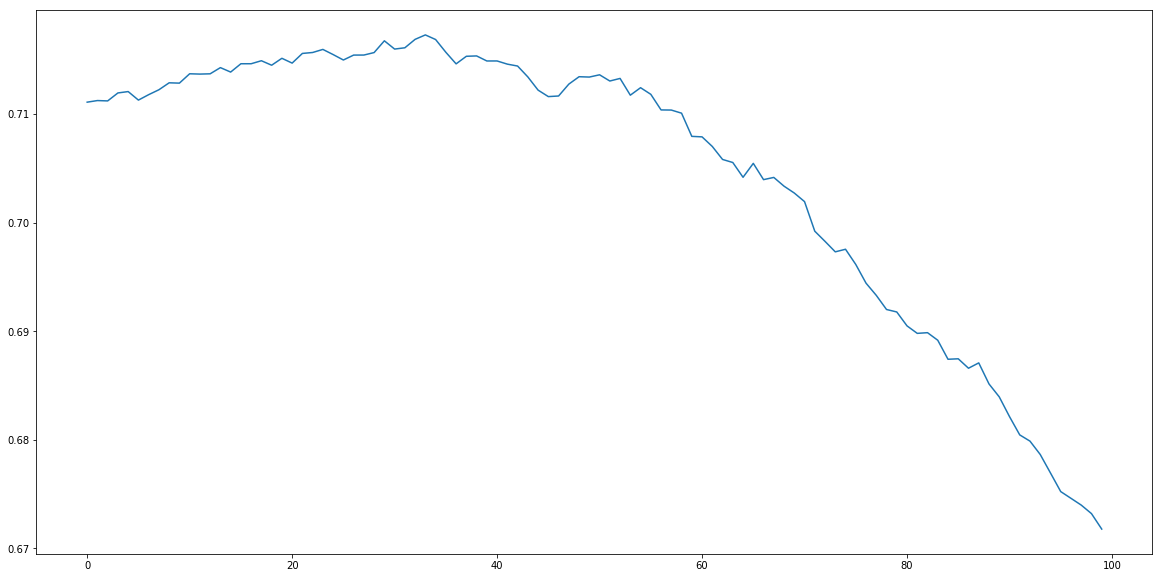

In [54]:
plot_pred(bst, xgcv, y_cv)

In [55]:
bin_pred = Binarizer(threshold=0.3).transform(pred.reshape(-1,1))
f1 = f1_score(y_cv, bin_pred)
f1

ValueError: Found input variables with inconsistent numbers of samples: [25074, 58504]

In [42]:
print(pred)
print(bin_pred)

[2.84894885e-10 2.27357528e-08 5.77394621e-06 ... 1.00606625e-08
 9.94450867e-01 1.52895223e-06]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [43]:
f1 = f1_score(y_cv, bin_pred)
f1

0.6847428448461375

In [44]:
pred = bst.predict(xgtrain)
bin_pred = Binarizer(threshold=0.4).transform(pred.reshape(-1,1))
f1 = f1_score(y_train, bin_pred)
f1

0.9978168208753508

In [45]:
def plot_pred(model, x, y):
    pred = model.predict(x)
    f1_list = []
    thresholds = np.linspace(0.15, .55, 100)
    for i in thresholds:
        bin_pred = Binarizer(threshold=i).transform(pred.reshape(-1,1))
        f1 = f1_score(y, bin_pred)
        f1_list.append(f1)
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(f1_list)
    return thresholds[np.argmax(f1_list)]

0.5015151515151515

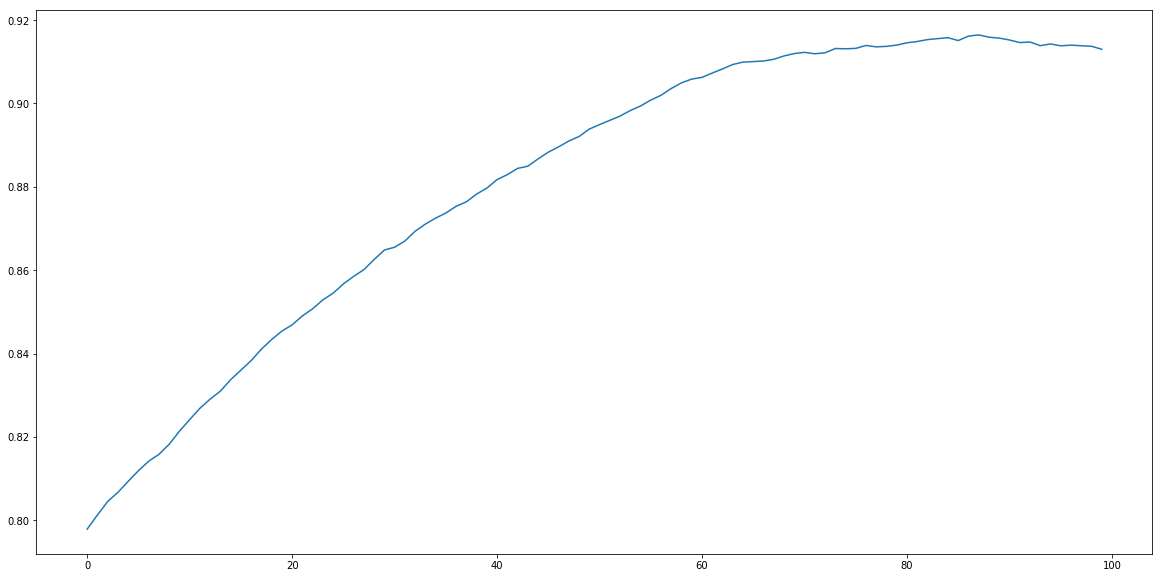

In [56]:
plot_pred(bst, xgtrain, y_train)

In [ ]:
bst.get_fscore()

In [61]:
from bayes_opt import BayesianOptimization

In [90]:
def XGB_CV(
          max_depth,
          gamma,
          min_child_weight,
          max_delta_step,
          subsample,
          colsample_bytree,
          lamb,
          alpha
         ):

    global AUCbest
    global ITERbest
    AUCbest = 0
    ITERbest = 0

#
# Define all XGboost parameters
#

    paramt = {
              'booster' : 'gbtree',
              'max_depth' : int(max_depth),
              'gamma' : gamma,
              'eta' : 0.1,
              'objective' : 'binary:logistic',
              'nthread' : 4,
              'silent' : False,
#               'eval_metric': 'auc',
              'tree_method': 'gpu_hist', # Use GPU accelerated algorithm
              'lambda': lamb,
              'alpha': alpha,
              'subsample' : max(min(subsample, 1), 0),
              'colsample_bytree' : max(min(colsample_bytree, 1), 0),
              'min_child_weight' : min_child_weight,
              'max_delta_step' : int(max_delta_step),
              'seed' : 1001
              }
    log_file = open('test1.log', 'a')
    folds = 5
    cv_score = 0

    print("\n Search parameters (%d-fold validation):\n %s" % (folds, paramt), file=log_file )
    log_file.flush()

    xgbc = xgb.cv(
                    paramt,
                    xgtrain,
                    num_boost_round = 20000,
                    stratified = True,
                    nfold = folds,
                    verbose_eval = 10,
                    early_stopping_rounds = 10,
                    metrics = 'auc',
                    show_stdv = True
               )
    
    val_score = xgbc['test-auc-mean'].iloc[-1]
    train_score = xgbc['train-auc-mean'].iloc[-1]
    print(' Stopped after %d iterations with train-auc = %f val-auc = %f ( diff = %f ) train-gini = %f val-gini = %f' % ( len(xgbc), train_score, val_score, (train_score - val_score), (train_score*2-1),
    (val_score*2-1)) )
    if (val_score > AUCbest):
        AUCbest = val_score
        ITERbest = len(xgbc)

    return (val_score*2) - 1

In [91]:
XGB_BO = BayesianOptimization(XGB_CV, {
                                     'max_depth': (2, 12),
                                     'gamma': (0.001, 10.0),
                                     'min_child_weight': (0, 20),
                                     'max_delta_step': (0, 10),
                                     'subsample': (0.4, 1.0),
                                     'colsample_bytree': (0.4, 1.0),
                                     'lamb': (1.0, 1.7),
                                     'alpha': (0.0, 0.5)
                                    })

In [92]:
XGB_BO.explore({
              'max_depth':            [3, 8, 3, 8, 8, 3, 8, 3],
              'gamma':                [0.5, 8, 0.2, 9, 0.5, 8, 0.2, 9],
              'min_child_weight':     [0.2, 0.2, 0.2, 0.2, 12, 12, 12, 12],
              'max_delta_step':       [1, 2, 2, 1, 2, 1, 1, 2],
              'subsample':            [0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8],
              'colsample_bytree':     [0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8],
              'lamb':                 [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7],
              'alpha':                [0.0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
              })

In [ ]:
XGB_BO.maximize(init_points=2, n_iter=5, acq='ei', xi=0.0)

Initialization
----------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |      lamb |   max_delta_step |   max_depth |   min_child_weight |   subsample | 
[0]	train-auc:0.887266+0.0100535	test-auc:0.886198+0.0177241
[10]	train-auc:0.961862+0.00162782	test-auc:0.960448+0.00321419
[20]	train-auc:0.969922+0.000723981	test-auc:0.96894+0.00193992
[30]	train-auc:0.971717+0.00065805	test-auc:0.970833+0.00179498
[40]	train-auc:0.972654+0.000596129	test-auc:0.971652+0.00155369
[50]	train-auc:0.973344+0.000533081	test-auc:0.972204+0.00148824
[60]	train-auc:0.973916+0.00058128	test-auc:0.972694+0.00141513
[70]	train-auc:0.974372+0.000553977	test-auc:0.972968+0.00139221
[80]	train-auc:0.974979+0.000540886	test-auc:0.973457+0.00142004
[90]	train-auc:0.975752+0.000405789	test-auc:0.973933+0.00150413
[100]	train-auc:0.976463+0.00039

/home/zach/dl_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00019434]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/zach/dl_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/home/zach/dl_env/lib/python3.6/site-packages/bayes_opt/helpers.py:109: RuntimeWarning: divide by zero encountered in true_divide
  z = (mean - y_max - xi)/std


Bayesian Optimization
----------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |      lamb |   max_delta_step |   max_depth |   min_child_weight |   subsample | 
[0]	train-auc:0.966568+0.000560767	test-auc:0.965294+0.00278853
[10]	train-auc:0.973585+0.000426122	test-auc:0.972074+0.00225133
[20]	train-auc:0.975101+0.000448559	test-auc:0.97322+0.00201019
[30]	train-auc:0.976692+0.000339274	test-auc:0.974393+0.00148745
[40]	train-auc:0.978191+0.000219297	test-auc:0.975827+0.00150394
[50]	train-auc:0.978814+0.000223468	test-auc:0.976167+0.0014591
[60]	train-auc:0.979282+0.000222442	test-auc:0.976426+0.00148842
[70]	train-auc:0.979747+0.000178108	test-auc:0.976907+0.00123423
[80]	train-auc:0.980104+0.000163937	test-auc:0.976907+0.0012364
[90]	train-auc:0.98046+0.00015639	test-auc:0.976974+0.00120979
[100]	train-auc:0.98074

/home/zach/dl_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00013562]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/zach/dl_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00254361]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


[0]	train-auc:0.949997+0.0036382	test-auc:0.949614+0.0062259
[10]	train-auc:0.965909+0.00105907	test-auc:0.965343+0.00256953
[20]	train-auc:0.967938+0.000554511	test-auc:0.967574+0.00240496
[30]	train-auc:0.969237+0.00078715	test-auc:0.968782+0.00210946
[40]	train-auc:0.970392+0.000457453	test-auc:0.969945+0.00228072
[50]	train-auc:0.97101+0.000457586	test-auc:0.970702+0.00199596
[60]	train-auc:0.97175+0.000312923	test-auc:0.971267+0.00192259
[70]	train-auc:0.972353+0.000267249	test-auc:0.971753+0.00193295
[80]	train-auc:0.972999+0.000231463	test-auc:0.972321+0.00190912
[90]	train-auc:0.973613+0.000280456	test-auc:0.972821+0.00180192
[100]	train-auc:0.974239+0.000358273	test-auc:0.973282+0.00168657
[110]	train-auc:0.974685+0.000406712	test-auc:0.973614+0.00159158
[120]	train-auc:0.975186+0.000376681	test-auc:0.974041+0.00155012
[130]	train-auc:0.97557+0.000271261	test-auc:0.974359+0.00165529
[140]	train-auc:0.975893+0.000275707	test-auc:0.974608+0.00160456
[150]	train-auc:0.976243+0.00

In [ ]:
plot_pred(bst, xgtrain, y_train)

In [52]:
# use below for later - scales test

In [38]:
# encode string input values as integers
features = []
encoded_x = None
for i in encode_cols:
	label_encoder = LabelEncoder()
	feature = label_encoder.fit_transform(test[i].fillna('0'))
	feature = feature.reshape(test.shape[0], 1)
	onehot_encoder = OneHotEncoder(sparse=False)
	feature = onehot_encoder.fit_transform(feature)
	if encoded_x is None:
		encoded_x = feature
	else:
		encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("X shape: ", encoded_x.shape)
# encoded_x = np.array(features)
# encoded_x = encoded_x.reshape(X.shape[0], X.shape[1])
X = np.concatenate((test[other_cols].fillna(0), encoded_x), axis=1)

X shape:  (56208, 1049)
